失敗


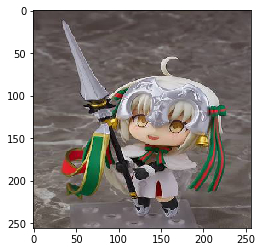

この写真は、 jeannealli
75 %の可能性で合っているだろう


0

In [76]:
import urllib.request as req
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

url = "train/JeanneAltLi/IMG_6089.JPG"

origin_img = cv2.imread(url)
img = origin_img.copy()

# カスケードファイルを指定して、検出器を作成
cascade_file = "lbpcascade_animeface.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img_face = img

# 画像の読み込んでグレースケール
img_gray = cv2.cvtColor(img_face, cv2.COLOR_RGB2GRAY)
# 顔認識
face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
# 結果
if len(face_list) == 0:
    print("失敗")


else:
    for (x, y, w, h) in face_list:
        print("顔の座標 = ", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img_face, (x, y), (x + w, y + h), red, thickness=20)
        # 出力
        
        cv2.imwrite("out.jpg", img)
        #切り取り
        img_face_ex = origin_img[y:y+h, x:x+w]
        #保存
        cv2.imwrite("out_face2.jpg", img_face_ex)
        check_jeanne_result('out_face2.jpg', model, label)
        
check_jeanne_result(url, model, label)
        

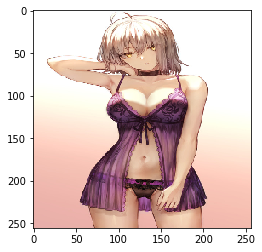

この写真は、 jeanneAlt
48 %の可能性で合っているだろう


0

In [72]:
'''
ライブラリのインポート
'''
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.models import load_model
from PIL import Image

%matplotlib inline

def model_loader(model_name):
    model = load_model(model_name)
    return model

def check_jeanne(url, model):
    # 対象画像のインポート
    img = Image.open(url)
    img = img.convert("RGB")
    img = img.resize((256, 256))
    plt.imshow(img)
    plt.show()

    x = np.asarray(img)
    x = x.reshape(-1, 256, 256, 3)
    x = x / 255

    # 予測
    pre = model.predict(x)
    idx = np.argmax(pre, axis=1)[0]
    per = int(pre[0][idx] * 100)
    return (idx, per, img)

def check_jeanne_result(url, model, label):
    idx, per, img = check_jeanne(url, model)
    '''
    labels = []
    for get_key in label.keys():
        labels.append(get_key)
    '''
    #答えを表示
    if per > 60:
        print("この写真は、", label[idx])
        print(per, "%の可能性で合っているだろう")
    else:
        print("分かりません")
        print(per)
    return 0

label = ['jeanne', 'jeanneAlt', 'jeannealli']
model = model_loader('jeanne_model3_e20.hdf5')